##     E-COMMERCE CUSTOMER SEGMENTATION SYSTEM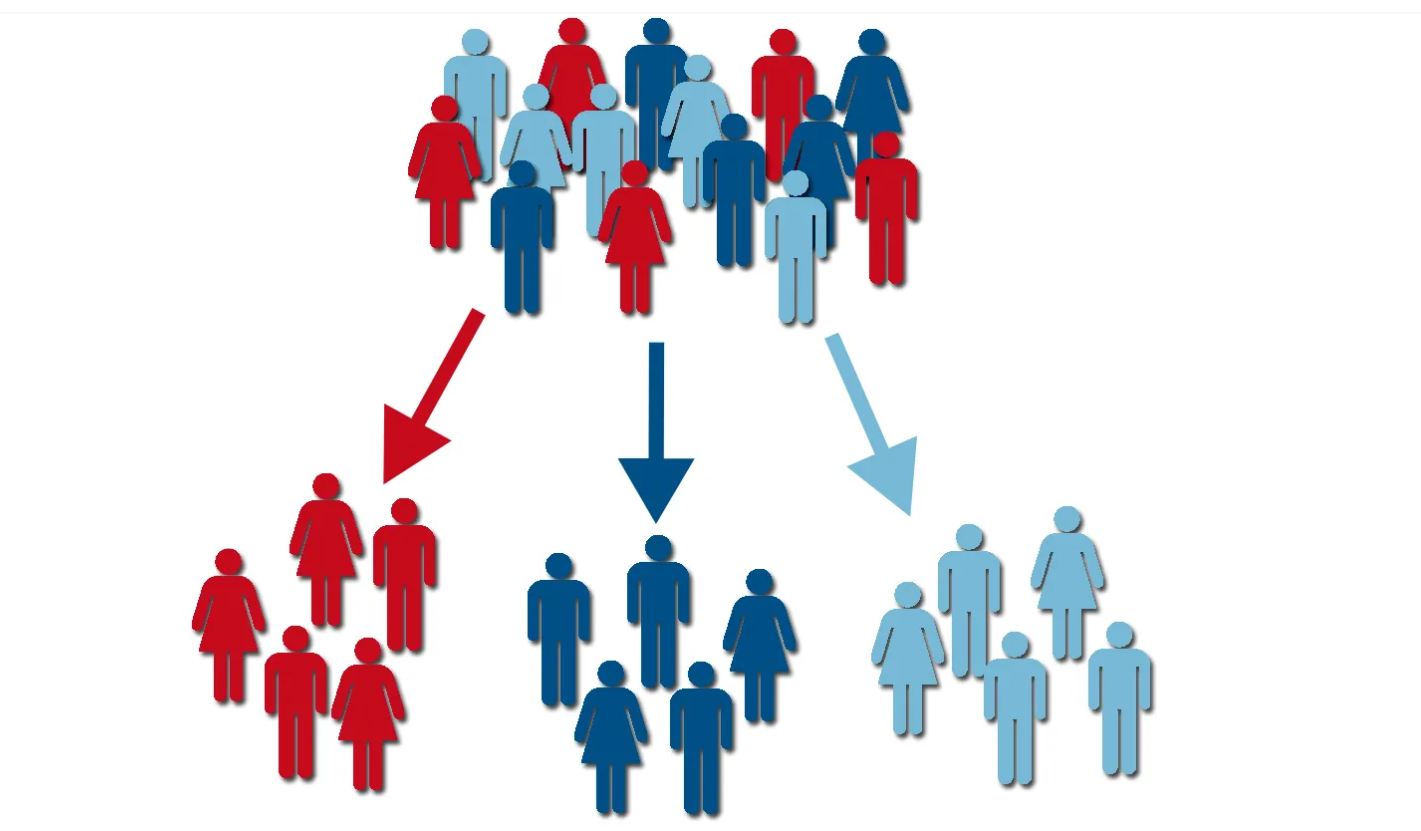

**About the Project & Dataset**

This project involves segmenting customers of an e-commerce platform based on their purchasing behavior using the E-commerce Customer Behavior dataset. The dataset provides comprehensive details of customer interactions and transactions, including demographics, spending habits, and satisfaction levels, through columns such as Customer ID, Gender, Age, City, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase, and Satisfaction Level. By applying clustering algorithms like K-means, we aim to identify distinct customer groups, enabling the development of tailored marketing strategies, improved customer satisfaction, and optimized promotional and retention strategies based on nuanced insights from the data. Note that this dataset is synthetically generated for illustrative purposes.

#Import the Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

#Load & Explore the Data

In [3]:
# Load the Data
file_path = 'E-commerce Customer Behavior - Sheet1.csv'
data = pd.read_csv(file_path)

In [4]:
# Data Exploration
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42       

In [5]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None


In [6]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                 

# Data Preprocessing & Feature Selection

In [7]:
#  Data Preprocessing
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [8]:
# Drop rows with missing values for simplicity
data = data.dropna()

In [9]:
# Step 4: Feature Selection
# Select relevant features for clustering
features = data[['Total Spend', 'Items Purchased', 'Days Since Last Purchase']]
# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


#Apply Clustring Algorithms

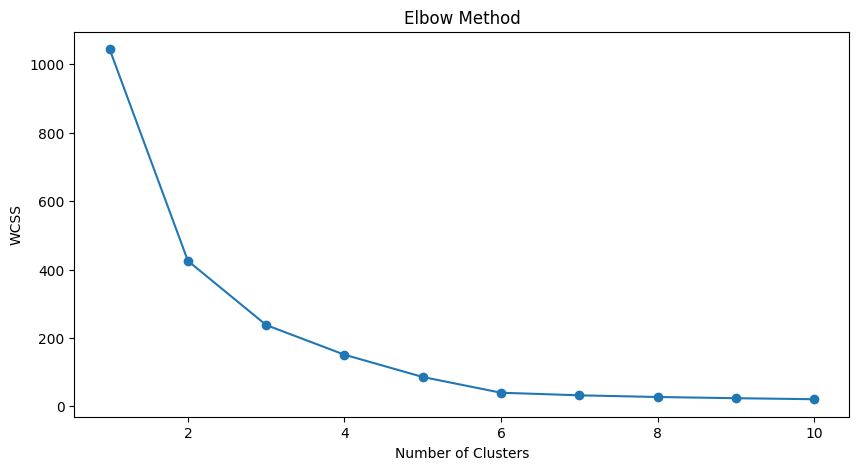

In [46]:
# Apply Clustering Algorithms
# Using K-means
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [47]:
# From the elbow plot, let's choose an optimal number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters

#Clustring Evaluation & Visualization

In [12]:
# Evaluate and Interpret the Results
# Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5402878399103308


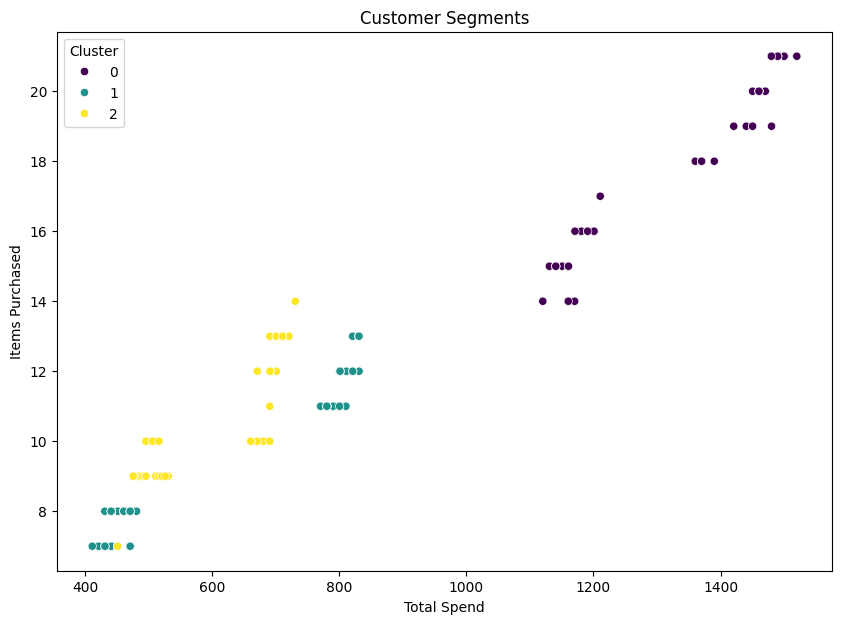

In [13]:
# Step 7: Visualize the Clusters
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Total Spend', y='Items Purchased', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()

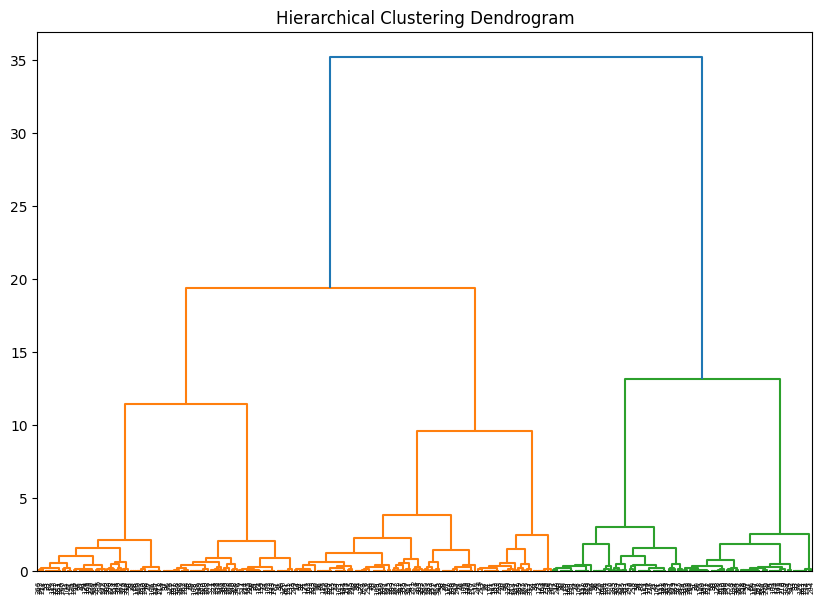

In [14]:
# Hierarchical Clustering Dendrogram
linked = linkage(features_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cluster Characteristics

In [15]:
# Tailor Marketing Strategies
# Example: Print cluster characteristics
for cluster in data['Cluster'].unique():
    print(f"\nCluster {cluster}")
    print(data[data['Cluster'] == cluster].describe())


Cluster 0
       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   117.000000  117.000000   117.000000       117.000000      117.000000   
mean    274.572650   29.923077  1311.144444        17.615385        4.675214   
std     101.331678    1.320618   151.929971         2.548990        0.167077   
min     101.000000   28.000000  1120.200000        14.000000        4.300000   
25%     188.000000   29.000000  1160.600000        15.000000        4.500000   
50%     275.000000   30.000000  1210.600000        17.000000        4.700000   
75%     361.000000   31.000000  1470.500000        20.000000        4.800000   
max     448.000000   36.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  Cluster  
count                117.000000    117.0  
mean                  17.940171      0.0  
std                    7.535308      0.0  
min                    9.000000      0.0  
25%                   11.000000      0.0  
50%       

#Summary of Segmentation

In [20]:
# Segment Summary and Criteria
print("\nSegment Summary and Criteria:")
segment_summary = data.groupby('Cluster').agg({
    'Total Spend': ['mean', 'std'],
    'Items Purchased': ['mean', 'std'],
    'Days Since Last Purchase': ['mean', 'std'],
    'Cluster': ['count']
})
segment_summary.columns = ['Total Spend Mean', 'Total Spend Std', 'Items Purchased Mean', 'Items Purchased Std', 'Days Since Last Purchase Mean', 'Days Since Last Purchase Std', 'Customer Count']
print(segment_summary)


Segment Summary and Criteria:
         Total Spend Mean  Total Spend Std  Items Purchased Mean  \
Cluster                                                            
0             1311.144444       151.929971             17.615385   
1              632.820175       180.467422              9.710526   
2              593.902564        97.721434             10.495726   

         Items Purchased Std  Days Since Last Purchase Mean  \
Cluster                                                       
0                   2.548990                      17.940171   
1                   2.135762                      18.815789   
2                   1.562623                      42.888889   

         Days Since Last Purchase Std  Customer Count  
Cluster                                                
0                            7.535308             117  
1                            4.626904             114  
2                            7.918527             117  


#Visualization of Segmenatation

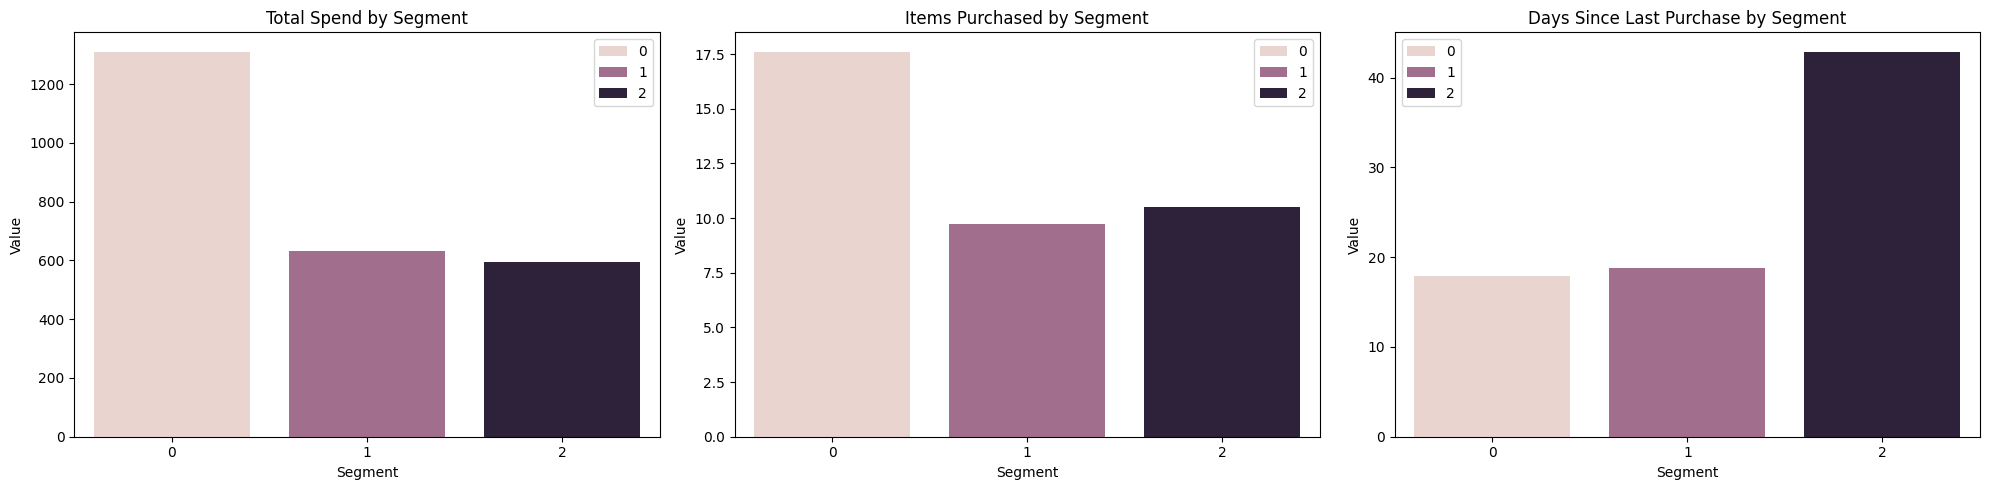

In [42]:
# Visualize the segment summary
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot the barplots directly from the segment_summary DataFrame
sns.barplot(x=segment_summary.index, y=segment_summary['Total Spend Mean'], hue=segment_summary.index, ax=axes[0], dodge=False)
sns.barplot(x=segment_summary.index, y=segment_summary['Items Purchased Mean'], hue=segment_summary.index, ax=axes[1], dodge=False)
sns.barplot(x=segment_summary.index, y=segment_summary['Days Since Last Purchase Mean'], hue=segment_summary.index, ax=axes[2], dodge=False)

# Set titles and labels
axes[0].set_title('Total Spend by Segment')
axes[1].set_title('Items Purchased by Segment')
axes[2].set_title('Days Since Last Purchase by Segment')

for ax in axes:
    ax.set_xlabel('Segment')
    ax.set_ylabel('Value')
    ax.legend()
plt.tight_layout()
plt.show()

# Classify New Customer

In [48]:
# Function to Classify New Customer
def classify_new_customer(new_customer_data, scaler, kmeans_model):
    """
    Classify a new customer based on their features.

    Parameters:
    new_customer_data (list or array): New customer features in the same order as the training data.
    scaler (StandardScaler): The scaler used to normalize the training data.
    kmeans_model (KMeans): The trained KMeans model.

    Returns:
    int: The cluster label for the new customer.
    """
    new_customer_scaled = scaler.transform([new_customer_data])
    cluster = kmeans_model.predict(new_customer_scaled)
    return cluster[0]

#Results

In [56]:
# Example new customer data (e.g., Total Spend: 5000, Items Purchased: 20, Days Since Last Purchase : 30)
new_customer_data = [5000, 20, 30]
new_customer_cluster = classify_new_customer(new_customer_data, scaler, kmeans)
print(f"New customer belongs to cluster: {new_customer_cluster}")

New customer belongs to cluster: 0


#Conclusion

In conclusion, the E-commerce Customer Segmentation Analysis project successfully identified distinct customer groups by leveraging clustering algorithms on a comprehensive dataset of customer behavior. By examining key metrics such as total spend, items purchased, and days since last purchased, I provided actionable insights into customer preferences and engagement patterns. This segmentation allows for the development of tailored marketing strategies, enhancing customer satisfaction and retention. The project underscores the value of data-driven decision-making in e-commerce, demonstrating how targeted strategies can optimize customer interactions and drive business growth.